# 2. Prepare Data

From https://machinelearningmastery.com/process-for-working-through-machine-learning-problems/

I preface data preparation with a data analysis phase that involves summarizing the attributes and visualizing them using scatter plots and histograms. I also like to describe in detail each attribute and relationships between attributes. This grunt work forces me to think about the data in the context of the problem before it is lost to the algorithms

The actual data preparation process is three step as follows:

* Step 1: Data Selection: Consider what data is available, what data is missing and what data can be removed.
* Step 2: Data Preprocessing: Organize your selected data by formatting, cleaning and sampling from it.
* Step 3: Data Transformation: Transform preprocessed data ready for machine learning by engineering features using scaling, attribute decomposition and attribute aggregation.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

%matplotlib inline

In [3]:
# expands columns to maximum width
pd.set_option('display.max_colwidth', -1)

In [4]:
from sklearn.linear_model import LinearRegression

## Retrieve resources

The data directory will be ignored by `git` and you will need to retrieve manually the resources.

You can retrieve the contents of this zip file into the data subdirectory from the link: 
https://s3.amazonaws.com/drivendata/data/1/public/cd238763-ed29-4a46-8584-f9334d57ec94.zip
You should have `data/TrainingSet.csv` and `data/SubmissionRows.csv`.

You will need as well to put the `countryinfo.py` file in the data/ folder: 
https://gist.githubusercontent.com/pamelafox/986163/raw/f5f9db4f1b287804fd07ffb3296ed0036292bc7a/countryinfo.py

## Training Set

In [6]:
df = pd.read_csv("data/TrainingSet.csv")

In [27]:
# look at the first few lines to get an idea what the actual data look like
df.head(2)

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,2007,Country_Name,Series_Code,Series_Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection


In [28]:
# last few lines
df.tail(2)

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,2007,Country_Name,Series_Code,Series_Name
286116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.3,NaN,Zimbabwe,SG.VAW.REFU.ZS,Women who believe a husband is justified in beating his wife when she refuses sex with him (%)
286117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,57.2,57.5,57.7,57.9,58.1,58.3,Zimbabwe,SH.DYN.AIDS.FE.ZS,Women's share of population ages 15+ living with HIV (%)


The first column looks like a row ID, let's double check to see if that's the case.

In [9]:
df.iloc[:,0].nunique() == df.shape[0]

True

There are as many unique rows in the index column as in the row dataframe dimension, so I'm going to use `index_col=0`.

In [10]:
df = pd.read_csv('data/TrainingSet.csv', index_col=0)

In [11]:
df.head(3)

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All Social Safety Nets


In [29]:
# what are the column names?
df.columns

Index(['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       'Country_Name', 'Series_Code', 'Series_Name'],
      dtype='object')

Let's rename the columns to remove gaps and unnecessary info and to ease further coding when selecting the sets of columns.

In [13]:
df.columns = [year[:4] for year in df.columns][:-3] + [col.replace(' ', '_') for col in df.columns.values[-3:]]

In [14]:
# some basic stats about the training data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1972,64945.0,1.630638e+11,4.261616e+12,-1.047939e+14,3.176702,63.940000,5.007000e+06,2.681335e+14
1973,64443.0,1.839488e+11,4.749746e+12,-1.128889e+14,3.550009,66.317365,7.131000e+06,2.943467e+14
1974,64966.0,2.089534e+11,5.378336e+12,-7.134161e+13,4.000000,70.485627,9.250000e+06,3.186506e+14
1975,66973.0,2.148826e+11,5.647070e+12,-8.269588e+13,3.671917,71.886131,1.108200e+07,3.383541e+14
1976,67717.0,2.321517e+11,6.120314e+12,-9.735652e+13,4.595300,74.563536,1.290000e+07,3.586152e+14
1977,69735.0,2.413682e+11,6.398377e+12,-9.433422e+13,5.000000,78.944621,1.540950e+07,3.895869e+14
1978,69763.0,2.540583e+11,6.710724e+12,-9.495898e+13,4.901495,78.638080,1.922850e+07,4.254506e+14
1979,69906.0,2.742810e+11,7.213662e+12,-5.362479e+13,5.000000,81.408655,2.409375e+07,4.556262e+14
1980,75250.0,2.674858e+11,7.381164e+12,-5.649790e+13,5.682373,81.829695,2.419225e+07,5.039050e+14
1981,78034.0,2.774415e+11,7.942777e+12,-5.437839e+13,5.000000,78.137173,2.317875e+07,5.815794e+14


In [15]:
# list of unique countries
df.Country_Name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 

In [17]:
print(f'Number of distinct countries: {df.Country_Name.nunique()}')

Number of distinct countries: 214


In [22]:
# number of unique values in each column
df.nunique()

1972            47534 
1973            47677 
1974            48521 
1975            50269 
1976            51279 
1977            53185 
1978            53578 
1979            53882 
1980            58032 
1981            59693 
1982            60516 
1983            60615 
1984            61088 
1985            62170 
1986            62726 
1987            63482 
1988            63814 
1989            65248 
1990            78732 
1991            77506 
1992            80642 
1993            81969 
1994            83600 
1995            88951 
1996            89206 
1997            90177 
1998            90256 
1999            94957 
2000            99186 
2001            99397 
2002            102167
2003            101224
2004            102863
2005            111682
2006            112989
2007            115182
Country_Name    214   
Series_Code     1305  
Series_Name     1305  
dtype: int64

In [20]:
# percentage of non-nul data in each column
(df.count() / df.shape[0] * 100).map('{:.1f}%'.format)

1972            33.2% 
1973            33.0% 
1974            33.2% 
1975            34.3% 
1976            34.7% 
1977            35.7% 
1978            35.7% 
1979            35.8% 
1980            38.5% 
1981            39.9% 
1982            40.4% 
1983            40.4% 
1984            40.7% 
1985            41.5% 
1986            41.7% 
1987            42.3% 
1988            42.6% 
1989            44.2% 
1990            54.7% 
1991            54.8% 
1992            57.4% 
1993            58.6% 
1994            59.8% 
1995            63.7% 
1996            63.7% 
1997            64.3% 
1998            64.5% 
1999            67.0% 
2000            71.9% 
2001            70.0% 
2002            71.8% 
2003            71.2% 
2004            72.9% 
2005            82.7% 
2006            81.3% 
2007            82.7% 
Country_Name    100.0%
Series_Code     100.0%
Series_Name     100.0%
dtype: object

## Submission data

In [23]:
# read the data containing the rows we need to predict
df_submission = pd.read_csv('data/SubmissionRows.csv', index_col=0)

In [24]:
df_submission.head(10)

,2008 [YR2008],2012 [YR2012]
559,NaN,NaN
618,NaN,NaN
753,NaN,NaN
1030,NaN,NaN
1896,NaN,NaN
1955,NaN,NaN
2090,NaN,NaN
2690,NaN,NaN
3233,NaN,NaN
3292,NaN,NaN


In [25]:
df_submission.shape

(737, 2)

As we have the row ID as an index for both the training (df) and the submission data, we can directly extract the data related to the submission index.

In [26]:
df_submission_in_data = df.loc[df_submission.index]

In [30]:
df_submission_in_data.Country_Name.nunique()

206

Let's have a look at the Series Codes in the submission data.

In [48]:
submission_codes = df_submission_in_data.Series_Code.unique()

In [53]:
print(f'List of unique submission codes: {list(submission_codes)}')
print(f'Number of unique submission codes: {len(submission_codes)}')

List of unique submission codes: ['7.8', '8.16', '4.1', '6.1', '2.1', '5.1', '6.7']
Number of unique submission codes: 7


In [56]:
print(f'Number of submission codes in Series Code column: {df.Series_Code.isin(submission_codes).sum()}')

Number of submission codes in Series Code column: 1118


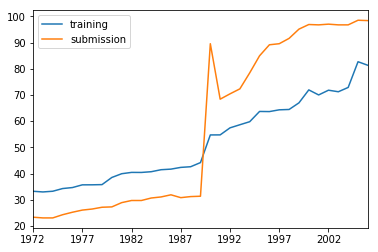

In [57]:
# plots of the percentage of non-null data in each column
(df.count() / df.shape[0] * 100).iloc[:-4].plot(label='training')
(df_submission_in_data.count() / df_submission_in_data.shape[0] * 100).iloc[:-4].plot(label='submission')
plt.legend();

We have learned from the analysis of the submission data that:
1. Most countries are represented in the submission data, 206 out of 214.
2. Only 7 codes are used and we have 1118 data points in the training data with these codes.
3. The amount of missing data is fairly similar between the training and submission data.

# What are we trying to achieve?

We have 737 indicators from 206 countries with data from 1972 to 2007.  
We would like to predict what these indicators will be in 2008 and 2012.  

A very simplistic way of predicting the future values of these indicators would be to do a simple linear regression for indicators with more than 1 data point in the last 35 years or use the only data point we have for indicators with a single value.

**Let's try to code this simplistic version**

In [62]:
def make_prediction(row):
    data = row.loc['1972':'2007']
    nbr_data_points = data.count()
    if nbr_data_points < 2:
        pred_2008 = data.dropna().values
        pred_2012 = pred_2008
    
    else:
        years = data.dropna().index.values.astype(np.int).reshape(-1, 1)
        values = data.dropna().values
        
        #linear regression
        regr = LinearRegression()
        regr.fit(years, values)
        
        #predictions
        pred_2008 = regr.predict(np.array([2008]).reshape(-1, 1))
        pred_2012 = regr.predict(np.array([2012]).reshape(-1, 1))
        
    return pred_2008[0], pred_2012[0]

In [63]:
df_simple_preds = pd.DataFrame(df_submission_in_data.apply(make_prediction, axis=1).tolist(), \
                               index=df_submission_in_data.index, columns=['2008','2012'])

In [64]:
df_simple_preds.head()

,2008,2012
559,0.465706,0.580451
618,0.012712,0.016830
753,0.087664,0.065155
1030,0.001000,0.001000
1896,0.961802,0.960782


Let's visualise the results

In [72]:
def plot_predictions(df_train, df_pred, nbr_rows):
    rows_to_plot = np.random.choice(df_train.index.values, nbr_rows, replace=False)
    
    cmap = get_cmap('Set1')
    colors = cmap.colors
        
    fig, ax = plt.subplots(figsize=(12,10))
    for i,j in zip(rows_to_plot, range(nbr_rows)):
        if j >= len(colors):
            j -= len(colors)
        ax.plot(df_train.loc[i, '1972':'2007'].dropna().index.astype(int), 
                df_train.loc[i, '1972':'2007'].dropna().values, 
                label=df_train.loc[i, 'Country_Name']+ ' / ' + df_train.loc[i, 'Series_Name'],
                marker='o',
                linewidth=4,
                alpha=0.5,
                color=colors[j])
                
        ax.plot(df_pred.loc[i].index.astype(int), 
                df_pred.loc[i].values,
                marker='s',
                linewidth=4,
                markersize=10,
                color=colors[j])

    plt.legend(loc=2)

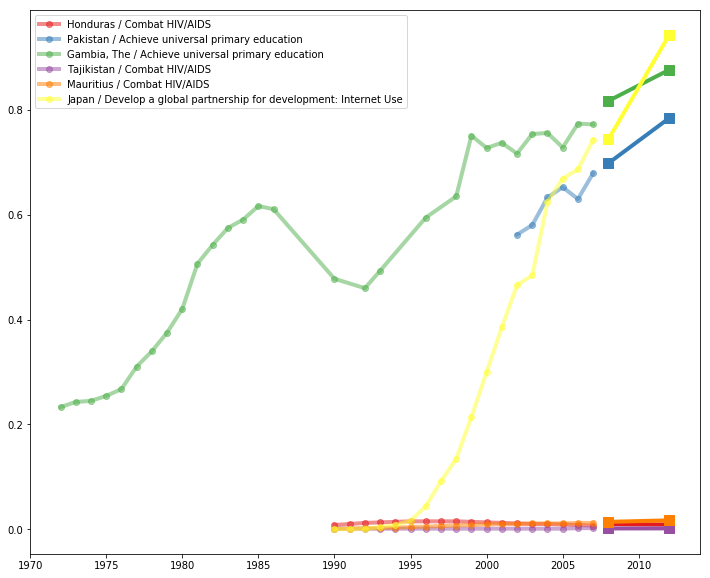

In [73]:
plot_predictions(df_submission_in_data, df_simple_preds, 6)

These results are simplistic but not too bad for most indicators.  
We could improve easily the results by doing a polynomial regression or another type of more sophisticated regression.  

But what we are trying to achieve is find correlation between these indicators and all the other indicators present in the dataset to improve our predictions as we have a lot of missing data.  
And these predictions using correlations are where the difficulty of this exercise lies.

## Separating sub codes from the main code values

Let's first make all values upper case to make sure we compare correctly the codes

In [69]:
df.Series_Code = df.Series_Code.str.upper()

In [70]:
df.Series_Code.nunique()

1305

We have 1305 different code names but most of them include similar codes which might be helpful when trying to find similarity within the data to help with our predictions.  
We will create a function that extract each of the subcodes and save them in separate column in function of their order in the code serie.

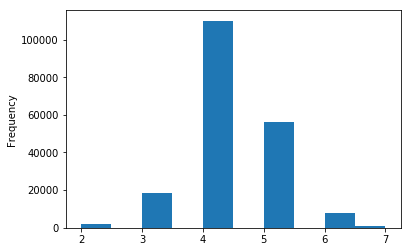

In [71]:
# Exploring the code structure
df.Series_Code.apply(lambda x: len(x.split('.'))).plot(kind='hist');

In [ ]:
row_longest_code_serie = df.Series_Code.apply(lambda x: len(x.split('.'))).idxmax()
df.loc[row_longest_code_serie, 'Series_Code']

In [ ]:
len(df.loc[row_longest_code_serie, 'Series_Code'].split('.'))

We have a maximum of 7 separate elements in the code structure

In [ ]:
def explode_code(s):
    # split the code name using the '.'
    s_split = s.split('.')
    
    # save the first and last value of the serie
    last = s_split[-1]
    first = s_split[0]
    
    # reverse the order of the code series to keep the last code as first and first as last
    #s_split = s_split[::-1]
    
    # add NaN values until the list has 7 items in it
    s_split += [np.NaN] * (7 - len(s_split))
    
    # add the first and last value to the list
    s_split += [first, last]
    
    return s_split

In [ ]:
# We first create 9 new columns for each of the output of the function explode_code
# fill these columns with the ouput of the explode_code function by converting its ouput to a list and then to a dataframe using the orginal index of the dataframe

df[['Series_Code_'+ str(i) for i in range(7)] + ['Series_Code_First', 'Series_Code_Last']] =\
    pd.DataFrame(df.Series_Code.apply(explode_code).tolist(), index=df.index)

In [ ]:
df.iloc[:5,-11:]

In [ ]:
df.iloc[-5:,-11:]

## Adding the continent related to each country

In [ ]:
from data import countryinfo

In [ ]:
df_continent = pd.DataFrame(countryinfo.countries)

In [ ]:
df_continent.columns

We copy the continent information from the dataframe using the country names as index

In [ ]:
# we use the map function of pandas for looking the the country name in the index of the second df and outputing the continent information
df['Continent'] = df.Country_Name.map(df_continent.set_index('name').continent)

In [ ]:
df[['Continent','Country_Name']].iloc[::15000]

We have some countries with names that are different from our list of country/continent

In [ ]:
df[df.Continent.isna()].Country_Name.unique()

In [ ]:
df[df.Country_Name.str.contains('Bahamas', case=False)].Country_Name.unique()

In [ ]:
df_continent[df_continent.name.str.contains('Bahamas', case=False)]

### Continent missing values

Let's do some fuzzy matching to find the most likely candidate for the country listed in our database

In [ ]:
!pip3 install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
country_bad_name = df[df.Continent.isna()].Country_Name.unique()
countries = df_continent.name.values

In [ ]:
country = country_bad_name[0]
print(country)
process.extractOne(country, countries)

In [ ]:
df_fuzzy = pd.DataFrame([[country]+list(process.extractOne(country, countries)) for country in country_bad_name], 
                        columns=['training_name', 'replacement_name', 'score'])

In [ ]:
df_fuzzy.head()

In [ ]:
# Let's add the continent to this dataframe
df_fuzzy['Continent'] = df_fuzzy.replacement_name.map(df_continent.set_index('name').continent)

In [ ]:
df_fuzzy.head()

In [ ]:
# Replacement_name that we are most sure about
df_fuzzy[df_fuzzy.score > 86]

In [ ]:
# Replacement_name that we are most sure about
df_fuzzy[df_fuzzy.score < 86]

We are missing a few easy fix like Congo and Korea

Let's fill the missing continents using the above rule

In [ ]:
countries_to_correct = df.Country_Name.isin(df_fuzzy[df_fuzzy.score > 86].training_name)

df.loc[countries_to_correct, 'Continent'] =\
    df.loc[countries_to_correct, 'Country_Name'].map(
        df_fuzzy[df_fuzzy.score > 86].set_index('training_name').Continent)

#### Let's redo the above fuzzy matching but trying a different metric to catch more missing values

In [ ]:
country_bad_name = df[df.Continent.isna()].Country_Name.unique()
countries = df_continent.name.values

In [ ]:
country = country_bad_name[5]
print(country)
print(process.extractOne(country, countries))
print(process.extractOne(country, countries, scorer=fuzz.ratio))
print(process.extractOne(country, countries, scorer=fuzz.partial_ratio))
print(process.extractOne(country, countries, scorer=fuzz.token_sort_ratio))
print(process.extractOne(country, countries, scorer=fuzz.token_set_ratio))
print(process.extractOne(country, countries, scorer=fuzz.partial_token_set_ratio))

In [ ]:
df_fuzzy = pd.DataFrame([[country]+list(process.extractOne(country, 
                                                           countries, 
                                                           scorer=fuzz.ratio
                                                          )) for country in country_bad_name], 
                        columns=['training_name', 'replacement_name', 'score'])

In [ ]:
# Let's add the continent to this dataframe
df_fuzzy['Continent'] = df_fuzzy.replacement_name.map(df_continent.set_index('name').continent)

In [ ]:
# Replacement_name that we are most sure about
df_fuzzy[df_fuzzy.score > 79]

Let's fill the missing continents using the above rule

In [ ]:
countries_to_correct = df.Country_Name.isin(df_fuzzy[df_fuzzy.score > 79].training_name)

df.loc[countries_to_correct, 'Continent'] =\
    df.loc[countries_to_correct, 'Country_Name'].map(
        df_fuzzy[df_fuzzy.score > 79].set_index('training_name').Continent)

#### Manual corrections for Korea, Congo and China

In [ ]:
df_continent[df_continent.name.str.contains('congo', case=False)]

In [ ]:
df_continent[df_continent.name.str.contains('korea', case=False)]

In [ ]:
df.loc[df.Country_Name.str.contains('congo', case=False), 'Continent'] = 'Africa'
df.loc[df.Country_Name.str.contains('korea', case=False), 'Continent'] = 'Asia'
df.loc[df.Country_Name.str.contains('china', case=False), 'Continent'] = 'Asia'

What is left in our missing continent?

In [ ]:
country_bad_name = df[df.Continent.isna()].Country_Name.unique()
country_bad_name

In [ ]:
len(country_bad_name)

In [ ]:
df.Country_Name.isin(country_bad_name).sum() / df.shape[0] * 100

In [ ]:
df_submission_in_data.Country_Name.isin(country_bad_name).sum() / df_submission_in_data.shape[0] * 100

We have less than 5% of the data with a missing continent in the training and submission data so we can probably leave it as it is and just replace it with Missing

In [ ]:
df.loc[df.Country_Name.isin(country_bad_name), 'Continent'] = 'Missing'

In [ ]:
df.head()

## Exploring the subcodes

In [ ]:
from collections import Counter

10 most common subcodes

In [ ]:
Counter(df.loc[:, 'Series_Code_0':'Series_Code_Last'].values.flat).most_common(10)

Most common codes for each subcode column ignoring the nan values

In [ ]:
def most_common_code(array, codes):
    array_notna = array[~pd.isna(array)]
    common_code = np.array(Counter(array_notna).most_common(codes))[:,0]
    common_code = np.append(common_code, [np.nan]*(codes-len(common_code)))
    return common_code

In [ ]:
pd.DataFrame(data= np.apply_along_axis(func1d=most_common_code, 
                                       arr=df.loc[:, 'Series_Code_0':'Series_Code_Last'].values,
                                       axis=0,
                                      codes=15), 
             columns=df.loc[:, 'Series_Code_0':'Series_Code_Last'].columns)